In [1]:
import qim3d

### Local thickness notebook

This notebook shows an example of how to determine the **local thickness** of an object in either 2D and 3D using the `qim3d` library. The local thickness at a point within the object is defined as the radius of the largest circle (2D) or sphere (3D) that contains the point and is inside the object. 

In the following, the local thickness is computed for three examples:

* **Example 1**: 2D image of blobs 
* **Example 2**: 3D volume of shell 
* **Example 3**: 3D volume of cement

The local thickness algorithm is applied by using the `qim3d.processing.local_thickness` function, which expects a binary image/volume. If the input is not already binary, then it will be binarized automatically using Otsu's thresholding method. The `qim3d.processing.local_thickness` function returns a 2D or 3D Numpy array representing the local thickness of the input image/volume.


#### **Example 1**: Local thickness of 2D image
This example uses a 2D image of blobs (256 x 256), which can be acquired from `qim3d.examples.blobs_256x256`.

Input image is not binary. It will be binarized using Otsu's method with threshold: 74


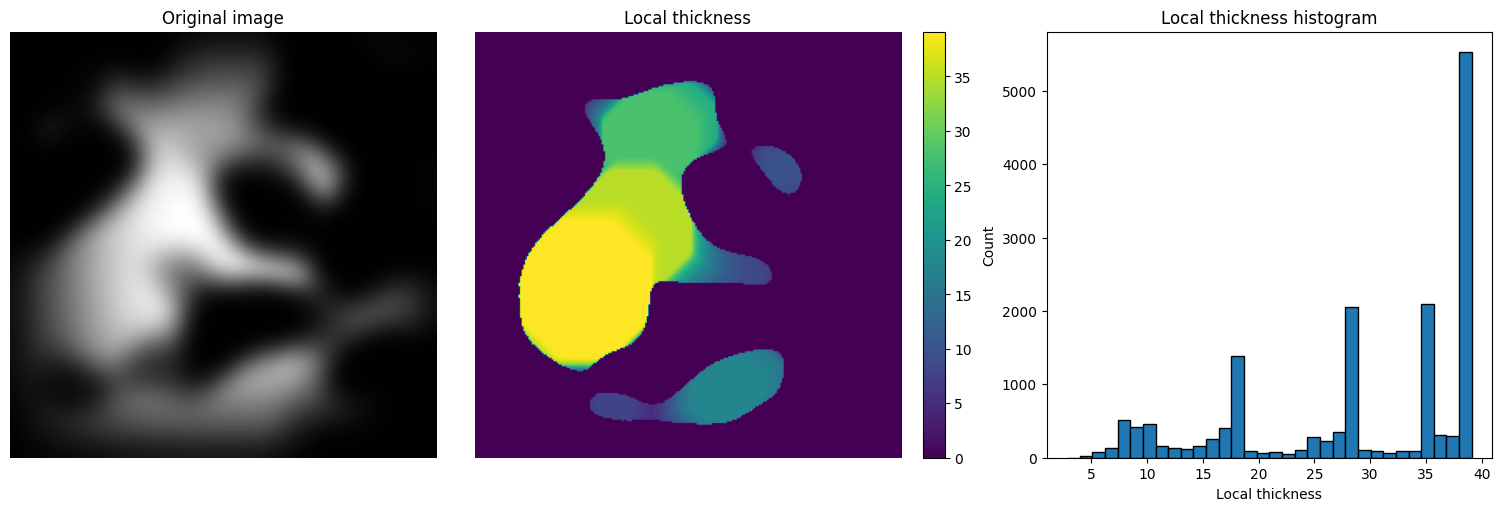

In [72]:
# Import 2D image of blobs
blobs = qim3d.examples.blobs_256x256

# Compute the local thickness of the blobs
lt_blobs = qim3d.processing.local_thickness(blobs, visualize = True)

#### **Example 2**: Local thickness of 3D volume
This example uses a 3D volume of a shell (225 x 128 x 128), which can be acquired from `qim3d.examples.shell_225x128x128`.

In [73]:
# Import 3D volume of shell
shell = qim3d.examples.shell_225x128x128

# Compute the local thickness of shell
lt_shell = qim3d.processing.local_thickness(shell, visualize = True, axis = 0)

Input image is not binary. It will be binarized using Otsu's method with threshold: 65


interactive(children=(IntSlider(value=112, description='Slice index', layout=Layout(width='450px'), max=224), …

#### **Example 3**: Local thickness of (binary) 3D volume
This example uses a 3D volume of cement (128 x 128 x 128), which can be acquired from `qim3d.examples.cement_128x128x128`.

For the previous two examples, the original image/volume was passed directly to the `qim3d.processing.local_thickness` function, which automatically binarized the input prior to computing the local thickness. 

For this example, the original volume will instead first be manually binarized with the `qim3d.processing.Blob.get_mask` method (see details in the documentation for `qim3d.processing.Blob`). Then the binarized volume (i.e. mask) will be passed to the `qim3d.processing.local_thickness` function, which can then directly compute the local thickness. 

**Importing, filtering and visualizing volume**

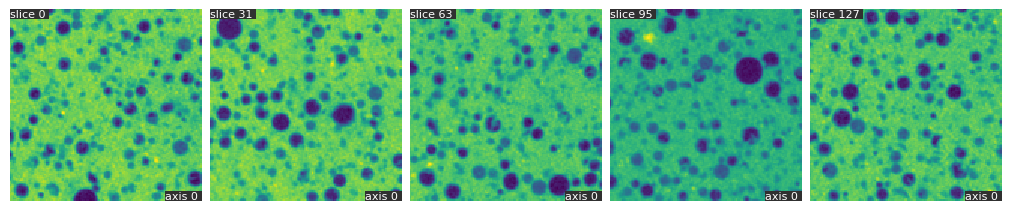

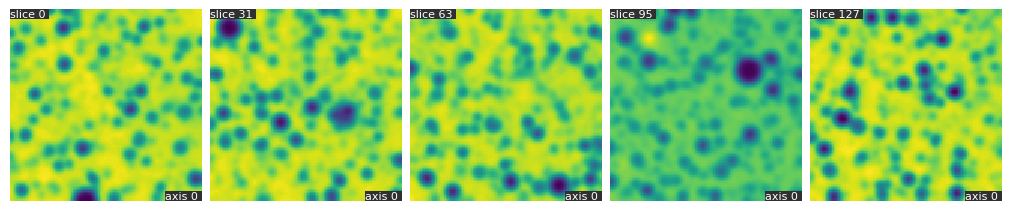

In [70]:
# Import 3D volume of cement
cement = qim3d.examples.cement_128x128x128

# Visualize slices of the original cement volume
qim3d.viz.slices_grid(cement, n_slices = 5, show = True)

# Apply Gaussian filter to the cement volume
cement_filtered = qim3d.processing.gaussian(cement, sigma = 2)

# Visualize slices of the filtered cement volume
qim3d.viz.slices_grid(cement_filtered)

**Detecting blobs in volume, creating binary mask**

In [74]:
# Initialize Blob detector
blob_detector = qim3d.processing.Blob(
    min_sigma=1,
    max_sigma=8,
    threshold=0.001,
    overlap=0.1,
    background="bright"
    )

# Detect blobs
cement_blobs = blob_detector.detect(cement_filtered)

# Get binary mask and visualize
cement_mask = blob_detector.get_mask()
qim3d.viz.slicer(cement_mask)

interactive(children=(IntSlider(value=64, description='Slice', max=127), Output()), layout=Layout(align_items=…

**Computing local thickness**

In [75]:
# Compute the local thickness of cement (input: binary mask)
lt_cement = qim3d.processing.local_thickness(cement_mask, visualize = True, axis = 0)


interactive(children=(IntSlider(value=64, description='Slice index', layout=Layout(width='450px'), max=127), O…